In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
calendar = pd.read_csv('calendar.csv')
sales_train_validation = pd.read_csv('sales_train_validation.csv')
sell_prices = pd.read_csv('sell_prices.csv')

In [30]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [3]:
# Convert date column to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

In [4]:
# Define date columns
date_cols = [col for col in sales_train_validation.columns if col.startswith('d_')]

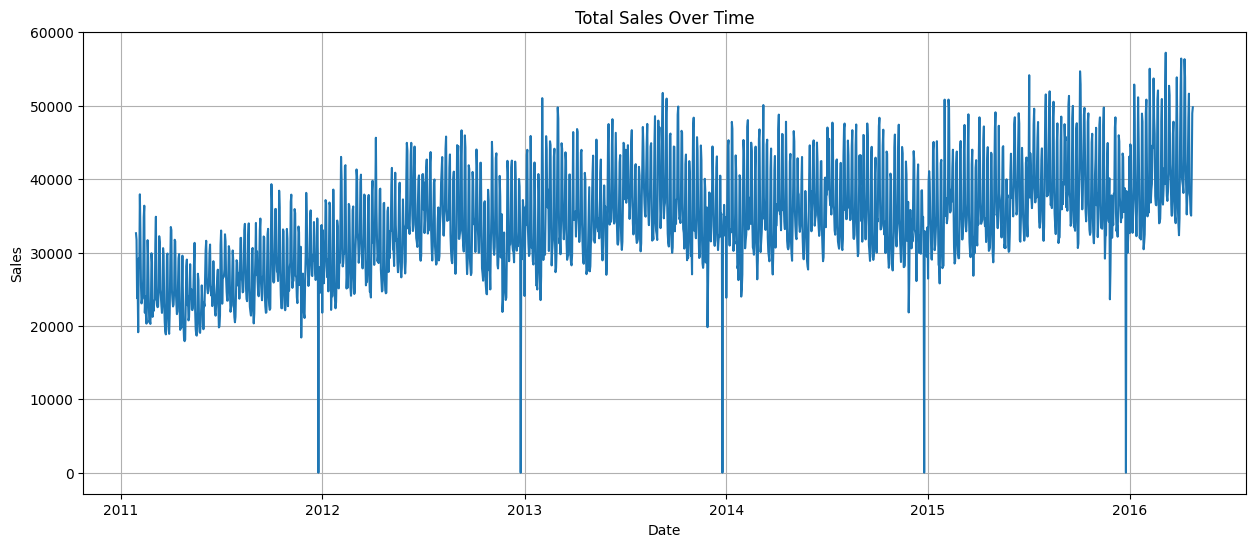

In [23]:
# 1. Sales trend over time
total_sales_by_date = sales_train_validation[date_cols].sum(axis=0).reset_index()
total_sales_by_date.columns = ['d', 'sales']
total_sales_by_date = total_sales_by_date.merge(calendar[['d', 'date']], on='d')

plt.figure(figsize=(15, 6))
plt.plot(total_sales_by_date['date'], total_sales_by_date['sales'])
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('Total Sales Over Time.png')
plt.show()

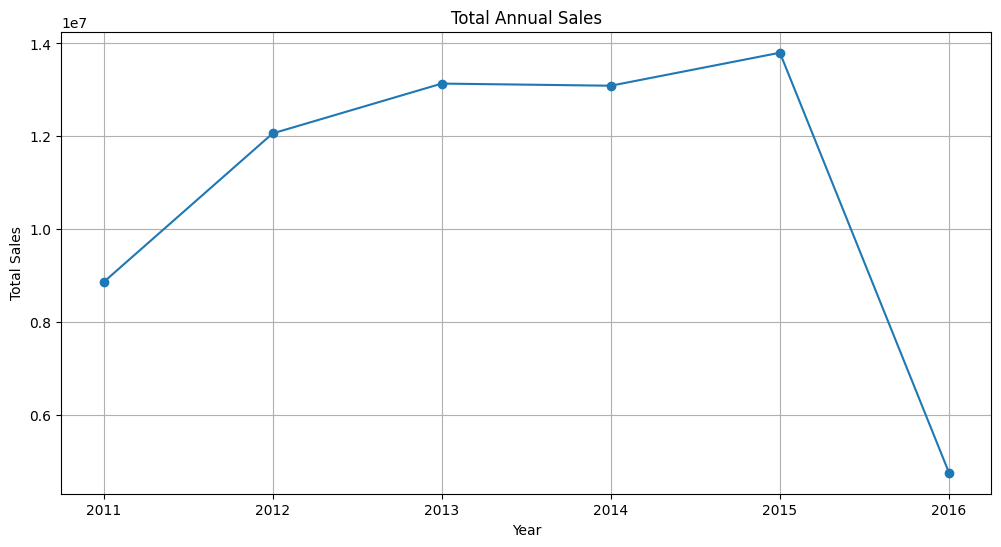

In [26]:
# Aggregate sales by year
total_sales_by_date['year'] = total_sales_by_date['date'].dt.year
annual_sales = total_sales_by_date.groupby('year')['sales'].sum().reset_index()

# Plot the total annual sales
plt.figure(figsize=(12, 6))
plt.plot(annual_sales['year'], annual_sales['sales'], marker='o')
plt.title('Total Annual Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.savefig('Total Annual Sales.png')
plt.show()

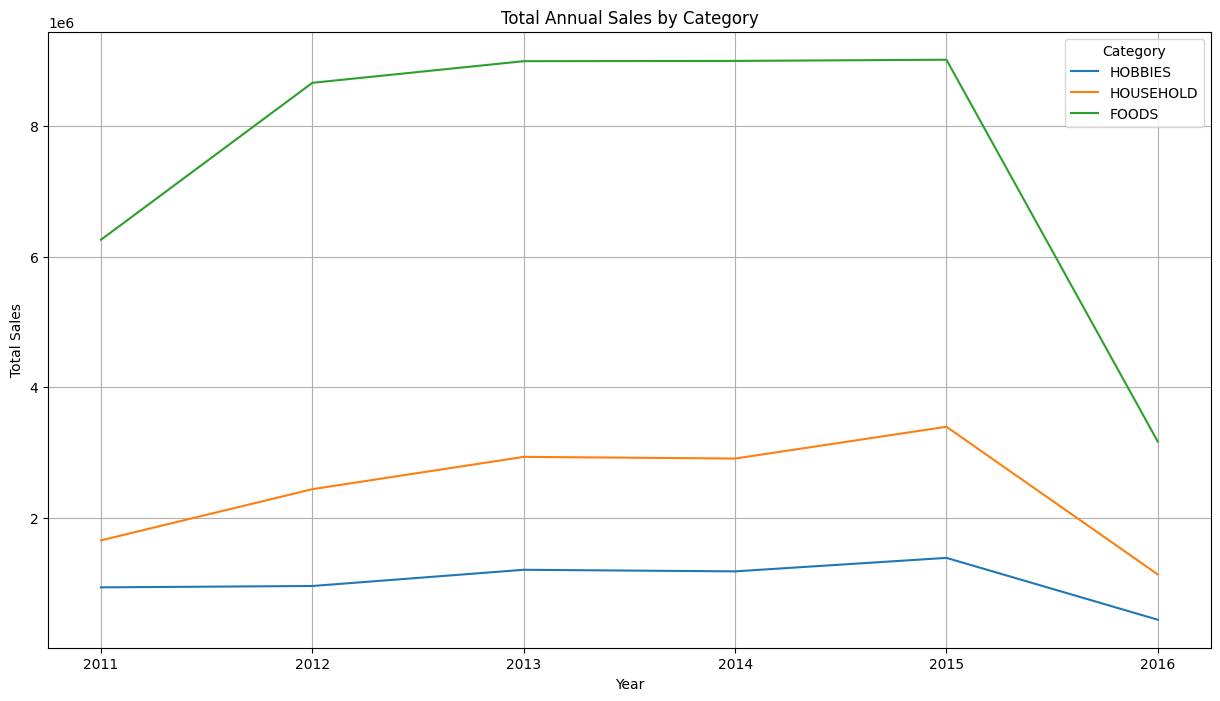

In [28]:
# Total Annual Sales by Category

# Create a DataFrame to hold the sum of sales for each category and year
years = pd.to_datetime(calendar.loc[calendar['d'].isin(date_cols), 'date']).dt.year.unique()
categories = sales_train_validation['cat_id'].unique()
annual_sales_by_category = pd.DataFrame(index=years, columns=categories).fillna(0)

# Sum sales by category and year
for col in date_cols:
    # Get the corresponding date for the current 'd_' column
    date = calendar.loc[calendar['d'] == col, 'date'].values[0]
    year = pd.to_datetime(date).year
    
    # Sum sales by category for the current 'd_' column
    sales_by_category = sales_train_validation.groupby('cat_id')[col].sum()
    
    # Add the sales to the corresponding year and category in the DataFrame
    annual_sales_by_category.loc[year] += sales_by_category

# Plot the total annual sales by category as line graph
plt.figure(figsize=(15, 8))
for category in categories:
    plt.plot(annual_sales_by_category.index, annual_sales_by_category[category], label=category)

plt.title('Total Annual Sales by Category')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.grid(True)
plt.savefig('Total Annual Sales by Category Line Graph.png')
plt.show()

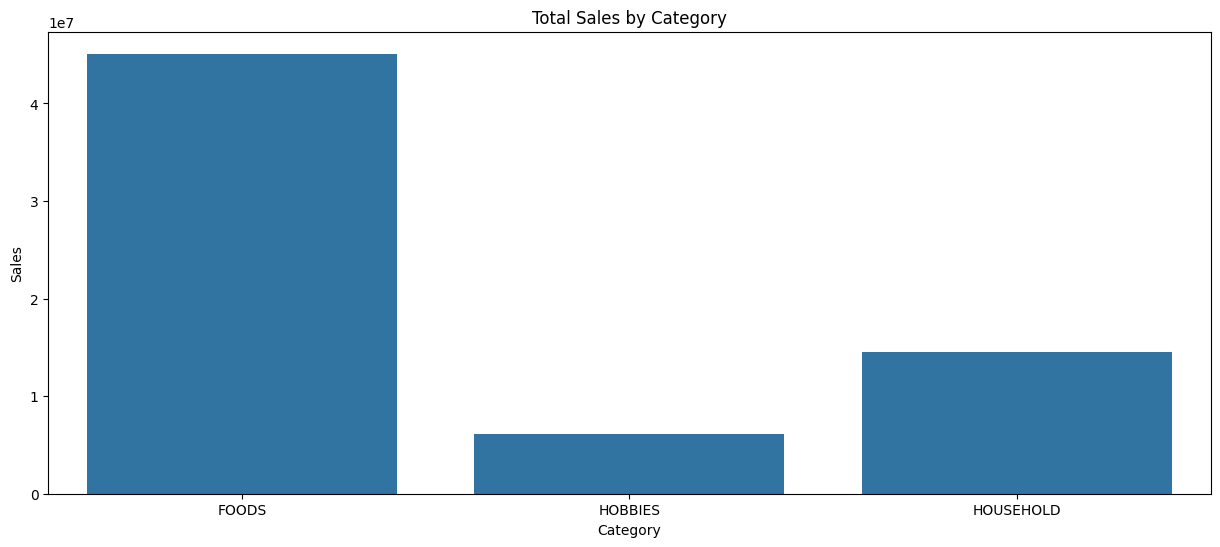

In [24]:
# Total Sales by category
category_sales = sales_train_validation.groupby('cat_id')[date_cols].sum().sum(axis=1).reset_index()
category_sales.columns = ['cat_id', 'sales']

plt.figure(figsize=(15, 6))
sns.barplot(x='cat_id', y='sales', data=category_sales)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.savefig('Total Sales by Category.png')
plt.show()

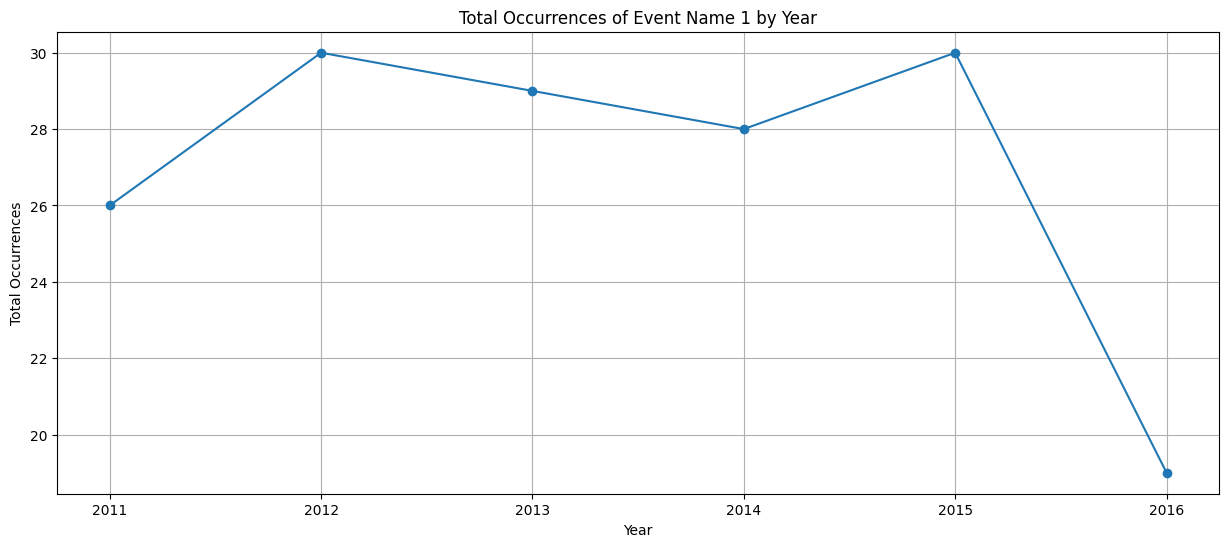

In [31]:
# Aggregate event_name_1 by year
event_name_1_by_year = calendar.groupby('year')['event_name_1'].count()

# Plot the total event_name_1 occurrences by year
plt.figure(figsize=(15, 6))
plt.plot(event_name_1_by_year.index, event_name_1_by_year.values, marker='o')

plt.title('Total Occurrences of Event Name 1 by Year')
plt.xlabel('Year')
plt.ylabel('Total Occurrences')
plt.grid(True)
plt.savefig('Total Occurrences of Event Name 1 by Year.png')
plt.show()

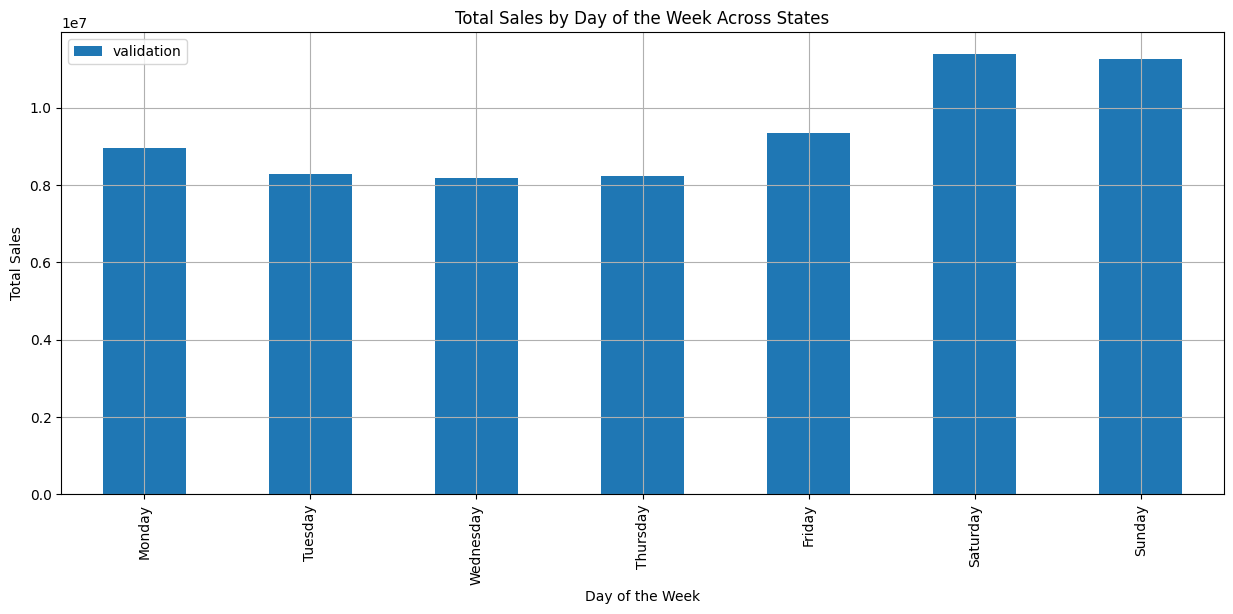

In [35]:
# Total Sales by Day of the Week Across States

# Add day of the week to calendar
calendar['day_of_week'] = calendar['date'].dt.day_name()

# Create a DataFrame to hold the total sales by day of the week and state
sales_train_validation['state_id'] = sales_train_validation['id'].str.split('_').str[-1]
sales_by_day_state = pd.DataFrame(index=calendar['day_of_week'].unique(), columns=sales_train_validation['state_id'].unique()).fillna(0)

# Aggregate sales by day of the week and state
for col in date_cols:
    # Get the corresponding date and day of the week for the current 'd_' column
    date = calendar.loc[calendar['d'] == col, 'date'].values[0]
    day_of_week = pd.to_datetime(date).day_name()
    
    # Sum the sales for each state on that day
    state_sales = sales_train_validation.groupby('state_id')[col].sum()
    
    # Add the sales to the corresponding day of the week and state in the DataFrame
    sales_by_day_state.loc[day_of_week] += state_sales

# Reorder days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_state = sales_by_day_state.loc[days_order]

# Plot the total sales by day of the week for each state
sales_by_day_state.plot(kind='bar', figsize=(15, 6))

plt.title('Total Sales by Day of the Week Across States')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
# plt.legend(title='State')
plt.grid(True)
plt.savefig('Total Sales by Day of the Week Across States.png')
plt.show()

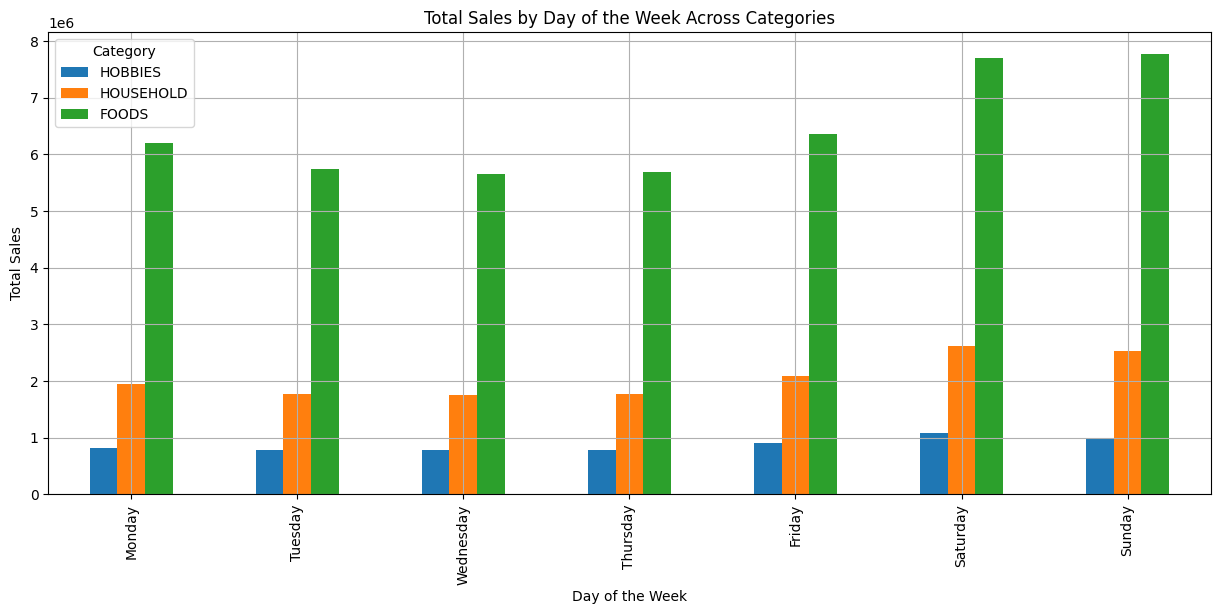

In [36]:
# Total Sales by Day of the Week Across Categories

# Initialize a dictionary to hold total sales for each category by day of the week
categories = sales_train_validation['cat_id'].unique()
sales_by_day_cat = {category: {day: 0 for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']} for category in categories}

# Aggregate sales by day of the week and category
for col in date_cols:
    # Get the corresponding date and day of the week for the current 'd_' column
    day_of_week = calendar.loc[calendar['d'] == col, 'day_of_week'].values[0]
    
    # Sum the sales for each category on that day
    category_sales = sales_train_validation.groupby('cat_id')[col].sum()
    
    # Add the sales to the corresponding day of the week and category in the dictionary
    for category in category_sales.index:
        sales_by_day_cat[category][day_of_week] += category_sales[category]

# Convert the dictionary to a DataFrame for easier plotting
sales_by_day_cat_df = pd.DataFrame(sales_by_day_cat)

# Reorder days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_cat_df = sales_by_day_cat_df.loc[days_order]

# Plot the total sales by day of the week for each category
fig, ax = plt.subplots(figsize=(15, 6))

sales_by_day_cat_df.plot(kind='bar', ax=ax)
ax.set_title('Total Sales by Day of the Week Across Categories')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Total Sales')
ax.legend(title='Category')
plt.grid(True)
plt.savefig('Total Sales by Day of the Week Across Categories.png')
plt.show()

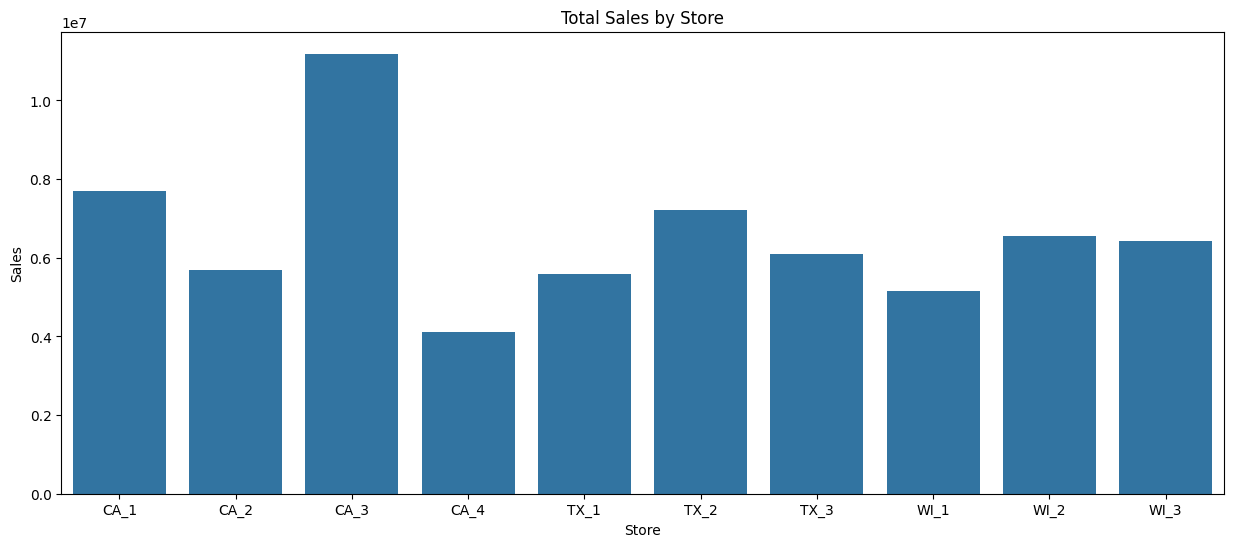

In [37]:
# Sales by store
store_sales = sales_train_validation.groupby('store_id')[date_cols].sum().sum(axis=1).reset_index()
store_sales.columns = ['store_id', 'sales']

plt.figure(figsize=(15, 6))
sns.barplot(x='store_id', y='sales', data=store_sales)
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.savefig('Total Sales by Store.png')
plt.show()